In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_json('trump_tweets_2009~2018.json')

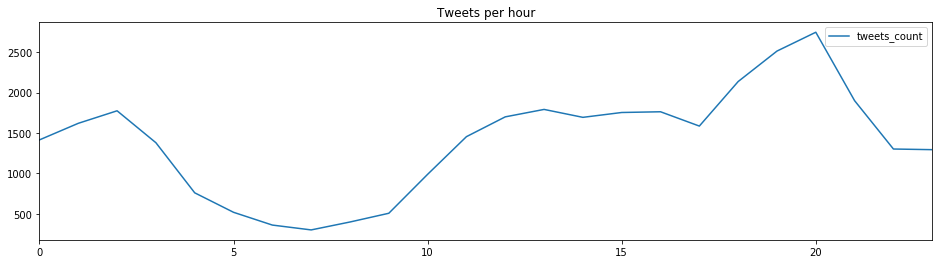

In [17]:
#一天内发推特的时间段
%matplotlib inline
time = pd.Series(index=data.created_at)
hours = list({i.hour for i in time.index})
counts = {}
for i in hours:
    c = 0
    for t in time.index.hour:
        if i == t:
            c += 1
    counts[i]=c
    
pd.Series(counts).plot(figsize=(16,4), label="tweets_count", legend=True, title='Tweets per hour');

In [20]:
#发推特的设备分析
tweets_source = data[['source']]
tweets_source['source_count'] = 1
tweets_source = tweets_source.groupby('source').agg('count').reset_index()
tweets_source.source[tweets_source.source_count<500]='otther'
tweets_source = tweets_source.groupby('source').agg('sum').reset_index()
tweets_source

,source,source_count
0,Twitter Web Client,12178
1,Twitter for Android,14545
2,Twitter for iPhone,5316
3,otther,1625


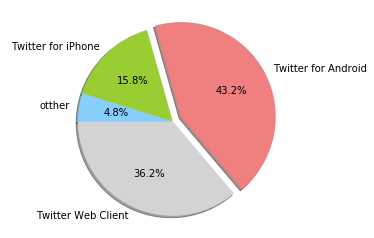

In [24]:
import matplotlib.pyplot as plt
labels=tweets_source.source.values
sizes=tweets_source.source_count.values
colors=['lightgray','lightcoral','yellowgreen','lightskyblue']
explode=0,0.1,0,0

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.show()

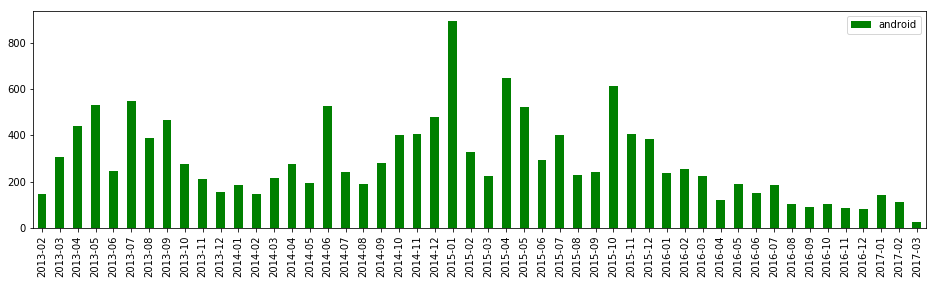

In [26]:
df_ad = data[data.source == 'Twitter for Android']
df_ip = data[data.source == 'Twitter for iPhone']
df_other = data[(data.source != 'Twitter for Android') & (data.source != 'Twitter for iPhone')]
def get_tweets_by_source(df_source):
    df_source.index = df_source.created_at
    result = {}
    for t in df_source.created_at:
        time = str(t)[:7]
        result[time] = len(df_source[time])

    return result

ad_tweets = get_tweets_by_source(df_ad)
ip_tweets = get_tweets_by_source(df_ip)
other_tweets = get_tweets_by_source(df_other)

ad = pd.Series(data=ad_tweets)
ip = pd.Series(data=ip_tweets)
other = pd.Series(data=other_tweets)

ad.plot(figsize=(16,4), label="android", legend=True,kind='bar',color='green')


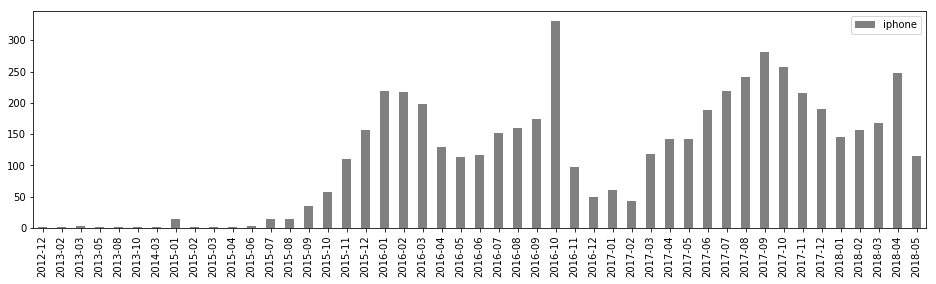

In [27]:
ip.plot(figsize=(16,4), label="iphone", legend=True,kind='bar',color='grey')

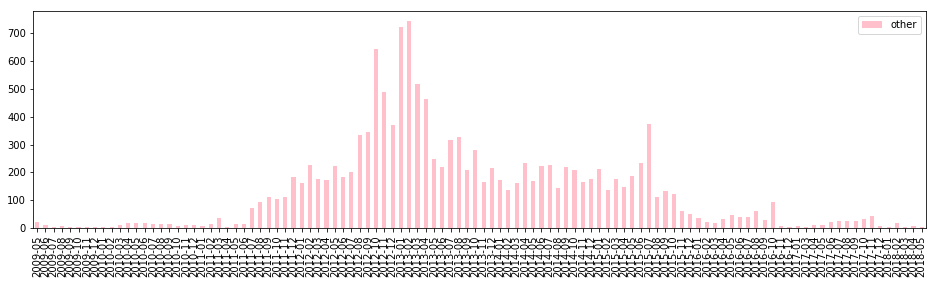

In [28]:
other.plot(figsize=(16,4), label="other", legend=True,kind='bar',color='pink')